In [1]:
# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualization
from sklearn.linear_model import LinearRegression  # For linear regression models
from scipy.stats import t  # For statistical functions
from sklearn.cluster import KMeans  # For K-Means clustering
from sklearn.metrics import silhouette_score  # To evaluate clustering quality
from sklearn.preprocessing import RobustScaler  # To scale data robustly against outliers
import warnings  # To manage warnings
# Suppress warnings
warnings.filterwarnings("ignore")  # Ignore warnings to avoid clutter during output

In [2]:
# Loading the dataset
data = pd.read_csv('supply_chain_data.csv') 

In [3]:
data.head()   # .head() dispalys top 5 rows to inspect the data.

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
data.info()      # .info() used to provides the information of the data and its type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
numeric_columns = data.select_dtypes(include=['number'])  # Selecting only numeric columns from the dataset

In [6]:
numeric_columns.describe()                               # using .describe() to see some basic stats of the data.

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [7]:
# Calculating Statistical Moments
# These statistics provide valuable insights into the distribution and characteristics of the data.
stats_moments = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Standard Deviation': numeric_columns.std(),
    'Skewness': numeric_columns.skew(),
    'Kurtosis': numeric_columns.kurt()})
stats_moments

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Price,49.462461,51.239831,31.168193,-0.022539,-1.373471
Availability,48.400000,43.500000,30.743317,0.183618,-1.331993
Number of products sold,460.990000,392.500000,303.780074,0.281418,-1.251394
Revenue generated,5776.048187,6006.352023,2732.841744,-0.173829,-1.417592
Stock levels,47.770000,47.500000,31.369372,0.101593,-1.234344
Lead times,15.960000,17.000000,8.785801,-0.129839,-1.188849
Order quantities,49.220000,52.000000,26.784429,-0.107373,-1.119273
Shipping times,5.750000,6.000000,2.724283,-0.281589,-1.071296
Shipping costs,5.548149,5.320534,2.651376,-0.053738,-1.183567
Lead time,17.080000,18.000000,8.846251,-0.326206,-1.174517


In [8]:
def plot_heatmap(data):
    '''
    Plots a correlation heatmap for numeric columns in the dataset.
    '''
    plt.figure(figsize=(10,7))  # Set figure size and resolution
    correlation_matrix = data.corr()  # Compute the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Plot heatmap with annotations
    plt.title('Correlation Heatmap', fontsize=14)  # Add title
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()  # Display the plot

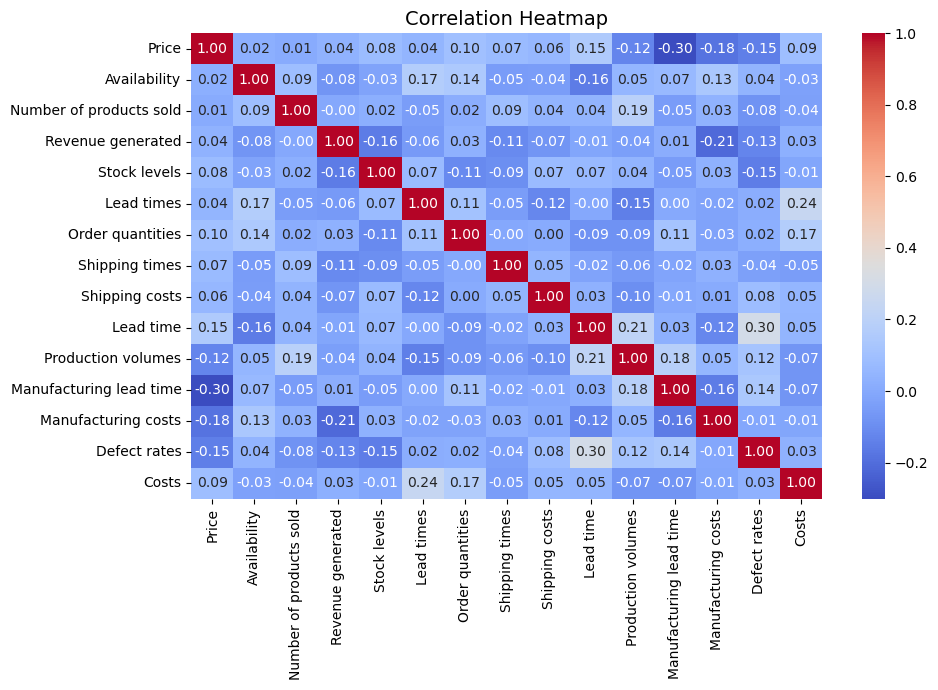

In [9]:
# visualize correlation
plot_heatmap(numeric_columns)

In [65]:
def plot_linear_fit_confidence_intervals(x, y, new_x=None):
    """
    Perform linear regression, plot the fit with confidence intervals and error bars,
    and optionally make predictions for new_x values.
    
    x : Independent variable (array-like)
    y : Dependent variable (array-like)
    new_x : Optional new data points to predict (array-like)
    """
    # Reshape x for sklearn compatibility
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)

    # Linear regression model
    model = LinearRegression()
    model.fit(x, y)
    
    # Predictions
    y_pred = model.predict(x)
    
    # Calculate confidence intervals
    n = len(y)
    mean_x = np.mean(x)
    t_val = t.ppf(1 - 0.025, df=n-2)  # 95% confidence interval
    se = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2))  # Standard error of residuals
    conf_interval = t_val * se * np.sqrt(1/n + (x - mean_x)**2 / np.sum((x - mean_x)**2))
    
    # Reshape conf_interval if needed
    conf_interval = conf_interval.flatten()
    
    # Make predictions for new_x if provided
    if new_x is not None:
        new_x = np.array(new_x).reshape(-1, 1)
        new_y_pred = model.predict(new_x)
        print("Predictions for new data points:")
        for i, pred in enumerate(new_y_pred):
            print(f"  x = {new_x[i][0]:.2f}, Predicted y = {pred:.2f}")
    else:
        new_y_pred = None
    
    # Plot data points
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data Points', color='blue')
    
    # Plot regression line
    plt.plot(x, y_pred, color='red', label='Regression Line')
    
    # Plot confidence intervals
    plt.fill_between(x.flatten(), 
                     (y_pred - conf_interval).flatten(), 
                     (y_pred + conf_interval).flatten(), 
                     color='pink', alpha=0.3, label='Confidence Interval')
    
    # Titles and labels
    plt.title('Linear Fit with Confidence Intervals')
    plt.xlabel('Independent Variable (lead time)')
    plt.ylabel('Dependent Variable (Manufacturing lead time)')
    plt.legend()
    plt.grid()
    plt.show()
    
    return model, new_y_pred

Predictions for new data points:
  x = 6.00, Predicted y = 14.47
  x = 20.00, Predicted y = 14.85
  x = 25.00, Predicted y = 14.98


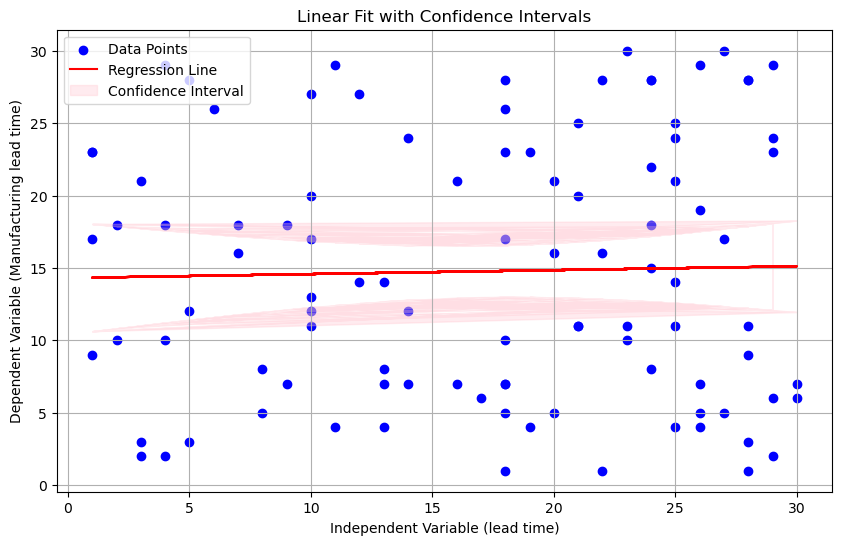

(LinearRegression(), array([14.47132443, 14.84871234, 14.98349373]))

In [97]:
# Assigning Sales and Profit
x = data["Lead time"]
y = data["Manufacturing lead time"]
new_x = [6,20,25]
# Useing the linear regression function
plot_linear_fit_confidence_intervals(x, y,new_x)

In [111]:
def bar_chart(data):
    """
    Plots a Bar chart
    """
    # Assigning to a variable
    location_counts = data['Location'].value_counts()
    
    # Define colors for each bar
    colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral']
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(location_counts.index, location_counts.values, color=colors, edgecolor='Black')
    
    plt.title('Major Stock Investment of Locations', fontsize=16)
    plt.xlabel('Location', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Adding the counts to the legend
    legend_labels = [f'{location}: {count}' for location, count in location_counts.items()]
    plt.legend(bars, legend_labels, loc='upper right')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

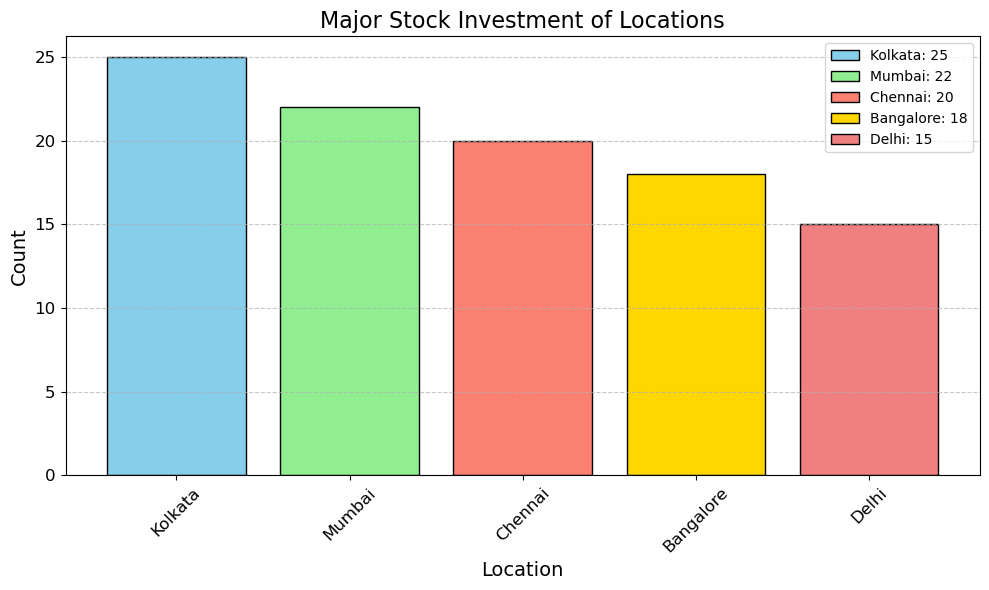

In [113]:
bar_chart(data)

In [51]:
# Preparing data for clustering
df_clust = data[['Lead time', 'Manufacturing lead time']].copy()   # Create a DataFrame columns for clustering.
# Initialize a RobustScaler to normalize the data while being robust to outliers.
scaler = RobustScaler()
# Apply the scaler to the selected columns and transform the data.
norm = scaler.fit_transform(df_clust)  # 'norm' is now a NumPy array with scaled values.

In [93]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method to determine the optimal number of clusters (k).
    - min_k (int): Minimum number of clusters .
    - max_k (int): Maximum number of clusters.
    - wcss (list or array): Within-cluster sum of squares for each k.
    - best_n (int): The optimal number of clusters determined.
    """
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=144)
    
    # Plot the WCSS values
    k_values = range(min_k, max_k + 1)
    ax.plot(k_values, wcss, 'x--', label='WCSS', markersize=8, linewidth=2)
    
    # Highlight the best k
    ax.scatter(best_n, wcss[best_n - min_k], color='red', edgecolor='black', s=100, zorder=5, label=f'Best k = {best_n}')
    ax.annotate(
        f'k={best_n}',
        xy=(best_n, wcss[best_n - min_k]),
        xytext=(best_n, wcss[best_n - min_k] + (max(wcss) - min(wcss)) * 0.05),
        fontsize=12,
        color='red',
        ha='center',
        arrowprops=dict(facecolor='red', arrowstyle='->', lw=2)
    )
    
    # Customize axes and labels
    ax.set_xlabel('Number of Clusters (k)', fontsize=14)
    ax.set_ylabel('WCSS', fontsize=14)
    ax.set_title('Elbow Method for Optimal k', fontsize=16)
    ax.set_xticks(k_values)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Legend
    ax.legend(fontsize=12)
    
    # Tight layout and display
    plt.tight_layout()
    plt.show()


In [79]:
def one_silhoutte_inertia(n, xy):
    """ 
    Calculates the silhoutte score and WCSS for n clusters
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [81]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")

 2 clusters silhoutte score = 0.38
 3 clusters silhoutte score = 0.44
 4 clusters silhoutte score = 0.45
 5 clusters silhoutte score = 0.42
 6 clusters silhoutte score = 0.40
 7 clusters silhoutte score = 0.41
 8 clusters silhoutte score = 0.43
 9 clusters silhoutte score = 0.43
10 clusters silhoutte score = 0.41
Best number of clusters =  4


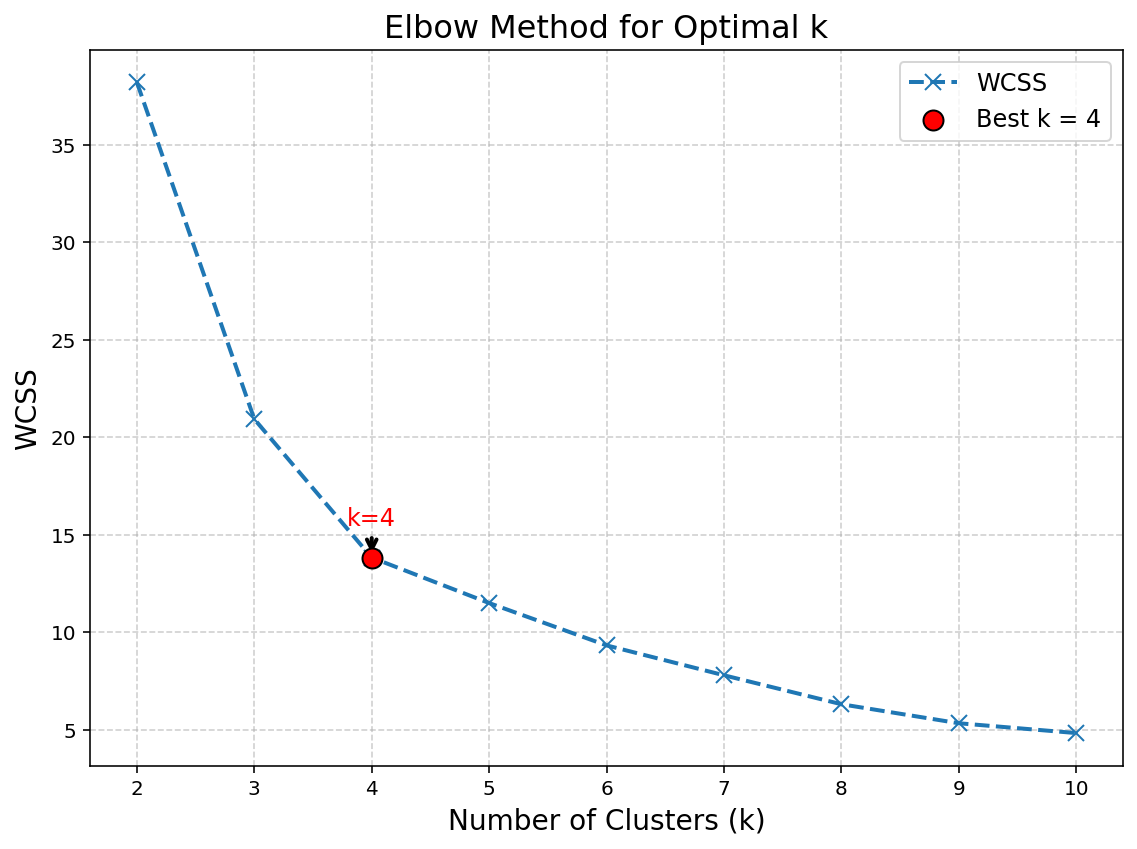

In [95]:
plot_elbow_method(2, 10, wcss, best_n)

In [115]:
def plot_clusters(labels, data, centers, x_centers, y_centers, center_labels, k):
    """
    Plots the results of K-Means clustering, including data points, cluster centers, and their labels.
    Parameters: labels (ndarray): Cluster labels for each data point.
        data (ndarray): Original (inverse-transformed) dataset.
        centers (ndarray): Cluster center coordinates (inverse-transformed).
        x_centers (ndarray): x-coordinates of cluster centers.
        y_centers (ndarray): y-coordinates of cluster centers.
        center_labels (ndarray): Labels of the cluster centers.
        k (int): Number of clusters (k) used in the K-Means algorithm.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot data points with cluster colors
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    
    # Highlight cluster centers
    plt.scatter(x_centers, y_centers, c='red', s=200, label='Cluster Centers', edgecolors='black')
    
    # Add cluster labels for centers
    for i, (x, y) in enumerate(zip(x_centers, y_centers)):
        plt.text(x, y, f'Center {center_labels[i]}', color='black', fontsize=9, ha='center', va='center')
    
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('Lead time')
    plt.ylabel('Manufact Lead time')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [117]:
def perform_kmeans(data, norm_data, scaler, k_range):
    """
    Performs K-Means clustering for a range of cluster numbers and visualizes the results.
    Parameters: data (ndarray): Original (inverse-transformed) dataset for plotting.
        norm_data (ndarray): Normalized dataset used for K-Means clustering.
        scaler (MinMaxScaler): Fitted scaler used to normalize the dataset.
        k_range (iterable): Range of `k` values (number of clusters) to evaluate.
    """
    for k in k_range:
        # Initialize and fit K-Means with the current number of clusters
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(norm_data)
        
        # Retrieve cluster labels and cluster centers
        labels = kmeans.labels_
        cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
        x_centers = cluster_centers[:, 0]
        y_centers = cluster_centers[:, 1]
        center_labels = kmeans.predict(kmeans.cluster_centers_)
        
        # Plot the results for the current k value
        plot_clusters(labels, data, cluster_centers, x_centers, y_centers, center_labels, k)

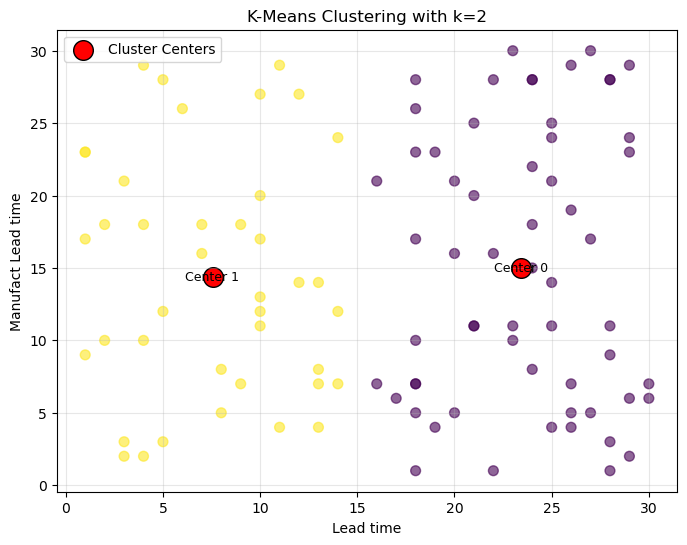

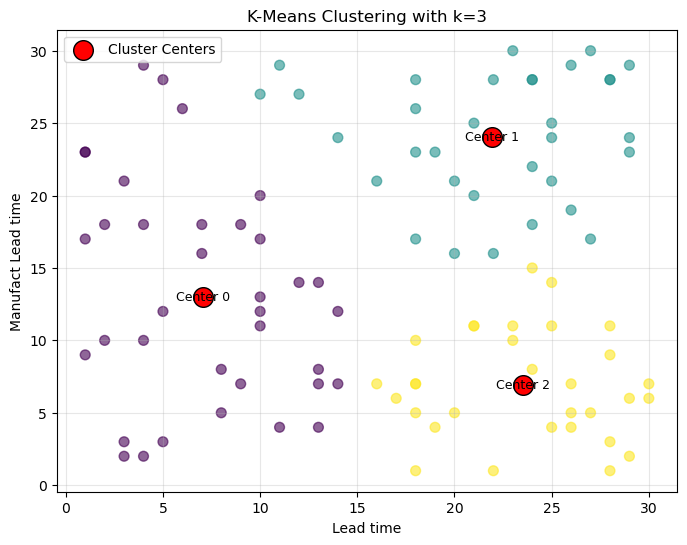

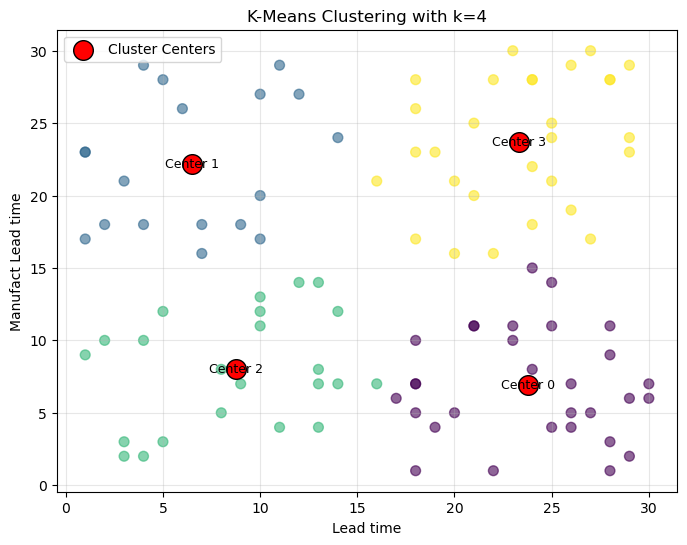

In [119]:
inv_norm = scaler.inverse_transform(norm)  # Important for accurate plotting of original data

# Perform KMeans for k values in the range 2
perform_kmeans(inv_norm, norm, scaler, k_range=range(2, 5))